In [2]:
import numpy as np # linear algebra
%matplotlib inline
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from matplotlib_venn import venn3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
import time
tokenizer = TweetTokenizer()
sns.set(style="white", context="talk")
nltk.download('punkt')
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
train = pd.read_json('train_gold.json', lines = True)
dev = pd.read_json('dev_unlabeled.json', lines = True)
categories = pd.read_json('categories.json', lines = True)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
train.head()

,idx,text,reply,categories,mp4
0,0,we can all agree that any song by Niall Horan.,oui oui,[yes],6dc39e96b11275f064fdaed88273b45e.mp4
1,1,Will you be installing #ScottyFromMarketing's ...,,[no],cfff051f05d8d3b7136c7d58ea6ad55f.mp4
2,2,Growing up my mum would call me a Nigga despit...,And he joins in??? Pour some hot grits on em,[smh],bf39e7bd9ad24354ce3ba6822b0104af.mp4
3,3,Rest your head on my chest when the world feel...,😂😂😂😂😂,[wink],173a707a04c277354a2f23cf01d6151e.mp4
4,4,Imagine Will Hernandez and Wills both doing a ...,,[yes],aab6d6bfb0c1382269ddba9b71cc8b7a.mp4


In [0]:
l = train['categories'].values.tolist()

In [0]:
def flatmatrix(matrix):
    result = []
    for i in range(len(matrix)):
        result.extend(matrix[i])
    return result

## 各類標籤的數量排序

In [6]:
cat_list = flatmatrix(l)
from collections import Counter
c = Counter(cat_list).most_common(43)
c

[('applause', 3442),
 ('hug', 3239),
 ('agree', 2987),
 ('yes', 2719),
 ('no', 2185),
 ('seriously', 2012),
 ('facepalm', 2001),
 ('smh', 1881),
 ('sigh', 1768),
 ('shocked', 1704),
 ('omg', 1551),
 ('slow_clap', 1343),
 ('eye_roll', 1221),
 ('idk', 1085),
 ('awww', 977),
 ('dance', 912),
 ('eww', 910),
 ('oh_snap', 904),
 ('ok', 878),
 ('shrug', 873),
 ('thank_you', 860),
 ('scared', 829),
 ('you_got_this', 827),
 ('oops', 816),
 ('happy_dance', 810),
 ('good_luck', 710),
 ('thumbs_up', 692),
 ('please', 616),
 ('popcorn', 583),
 ('wink', 574),
 ('high_five', 535),
 ('win', 474),
 ('yawn', 461),
 ('deal_with_it', 429),
 ('hearts', 339),
 ('sorry', 336),
 ('do_not_want', 327),
 ('fist_bump', 292),
 ('want', 283),
 ('thumbs_down', 220),
 ('yolo', 197),
 ('kiss', 193),
 ('mic_drop', 170)]

## Kevin's Preprocess

+ remove TF1 and uncommon word

In [0]:
def tokenize(text):
    tokens = []
    for each_text in text:
        tokens.append(tokenizer.tokenize(each_text.lower()))
    return tokens

In [0]:
def get_terms(token_list):
    vocabulary = Counter()
    for tokens in token_list:
        vocabulary.update(tokens)    
    return vocabulary

In [0]:
def get_idf(token_list):
    idf = []
    for token, freq in features_terms:
        count = 0
        for words in token_list:
            if token in words:
                count += 1
        idf.append(count)
    for i in range(len(idf)):
        idf[i] = math.log(len(token_list)/idf[i])
    return idf

In [0]:
def preprocess_tweet(tweet):
    tweet = tweet.lower()
    for word, count in tf_high:
        tweet = tweet.replace(' ' + word + ' ', ' ')
    for word in tf_1:
        tweet = tweet.replace(' ' + word + ' ', ' ')
    return tweet

In [11]:
df_new = train.copy()
df_dev_result = dev.copy([['text', 'reply']])
before = time.time()
text_list = df_new['text'].to_list()
tokens = tokenize(text_list)
features_terms = get_terms(tokens)
tf_high = features_terms.most_common(25)
tf_1 = [word for word, count in features_terms.most_common() if count==1]

df_new['text'] = df_new.text.apply(preprocess_tweet)
# # df_new['reply'] = df_new.reply.apply(preprocess_tweet)
df_dev_result['text'] = df_dev_result.text.apply(preprocess_tweet)
# df_dev_result['reply'] = df_dev_result.reply.apply(preprocess_tweet)
# print(df_new['text'][1])
# print(df_new['reply'][3])
after = time.time()
after - before

371.1429080963135

In [12]:
df_new.head()

,idx,text,reply,categories,mp4
0,0,we can all agree any song by horan.,oui oui,[yes],6dc39e96b11275f064fdaed88273b45e.mp4
1,1,will installing #scottyfrommarketing's new tra...,,[no],cfff051f05d8d3b7136c7d58ea6ad55f.mp4
2,2,growing up mum would call nigga despite her no...,And he joins in??? Pour some hot grits on em,[smh],bf39e7bd9ad24354ce3ba6822b0104af.mp4
3,3,rest your head chest when world feels heavy <3,😂😂😂😂😂,[wink],173a707a04c277354a2f23cf01d6151e.mp4
4,4,imagine will wills both doing pull stunt off s...,,[yes],aab6d6bfb0c1382269ddba9b71cc8b7a.mp4


## 各類前十高頻率的字

In [23]:
arr = []
category = categories.values.tolist()
category = flatmatrix(category)
for choose_word in category:
    res = []
    for i in range(len(df_new.categories)):
        if choose_word in df_new.categories[i]:
            res.append(df_new.text[i])
    tok_text = []
    for i in range(len(res)):
        tmp = tokenizer.tokenize(res[i].lower().replace('’', '').replace('...', '').replace('“', '').replace('”', ''))
        tok_text.append(tmp)

    clear_token = []
    for doc in tok_text:
        docu = []
        for word in doc:
            if word not in stopwords and word not in string.punctuation:
                docu.append(word)
        clear_token.append(docu)


    freq = Counter()
    for i in range(len(clear_token)):
        freq.update(clear_token[i])

    arr.append([choose_word, freq.most_common(10)])
df = pd.DataFrame(arr, columns = ['category', 'most_common word'])
df

,category,most_common word
0,agree,"[(people, 253), (like, 244), (im, 200), (dont,..."
1,applause,"[(im, 371), (people, 295), (like, 289), (today..."
2,awww,"[(love, 105), (️, 88), (like, 85), (im, 84), (..."
3,dance,"[(️, 74), (one, 67), (good, 65), (.., 62), (im..."
4,deal_with_it,"[(people, 49), (like, 39), (im, 38), (trump, 2..."
5,do_not_want,"[(gif, 57), (new, 41), (please, 31), (form, 31..."
6,eww,"[(gif, 86), (like, 74), (best, 67), (im, 60), ..."
7,eye_roll,"[(one, 148), (people, 133), (day, 116), (gif, ..."
8,facepalm,"[(people, 205), (trump, 187), (get, 141), (lik..."
9,fist_bump,"[(im, 27), (like, 27), (time, 22), (follow, 21..."


## 各類前十高頻率的bigram

In [27]:
from itertools import islice
def count_ngrams(iterable,n=2):
    return Counter(zip(*[islice(iterable,i,None) for i in range(n)]))

def ZipAll(iterable, n = 2):
    return zip(*[islice(iterable,i,None) for i in range(n)])

arr = []   
for choose_word in category:
    res = []
    for i in range(len(df_new.categories)):
        if choose_word in df_new.categories[i]:
            res.append(df_new.text[i])
    tokenizer = TweetTokenizer()
    tok_text = []
    for i in range(len(res)):
        tmp = tokenizer.tokenize(res[i].lower().replace('’', '').replace('...', '').replace('“', '').replace('”', ''))
        tok_text.append(tmp)
    
    clear_token = []
    for doc in tok_text:
        docu = []
        for word in doc:
            if word not in stopwords and word not in string.punctuation:
                docu.append(word)
        clear_token.append(docu)
    freq = Counter()
    for doc in clear_token:
        freq.update(ZipAll(doc, 2))
    # freq = count_ngrams(clear_token, 2)

    arr.append([choose_word, freq.most_common(10)])
df2 = pd.DataFrame(arr, columns = ['category', 'most_common bigram'])
df2

,category,most_common bigram
0,agree,"[((dont, trust), 43), ((😂, 😂), 40), ((covid, 1..."
1,applause,"[((👏, 🏽), 70), ((❤, ️), 67), ((🏽, 👏), 65), ((c..."
2,awww,"[((❤, ️), 40), ((🥺, 🥺), 16), ((♥, ️), 12), ((h..."
3,dance,"[((hi, guys), 39), ((guys, chat), 36), ((chat,..."
4,deal_with_it,"[((😂, 😂), 9), ((dont, buy), 8), ((buy, people)..."
5,do_not_want,"[((installing, #scottyfrommarketing's), 28), (..."
6,eww,"[((choose, gif), 53), ((gif, best), 53), ((bes..."
7,eye_roll,"[((one, gif), 86), ((day, who-the-hell-even-kn..."
8,facepalm,"[((would, never), 46), ((trump, supporter), 45..."
9,fist_bump,"[((😂, 😂), 9), ((stay, home), 7), ((❤, ️), 7), ..."


## 文字雲生成

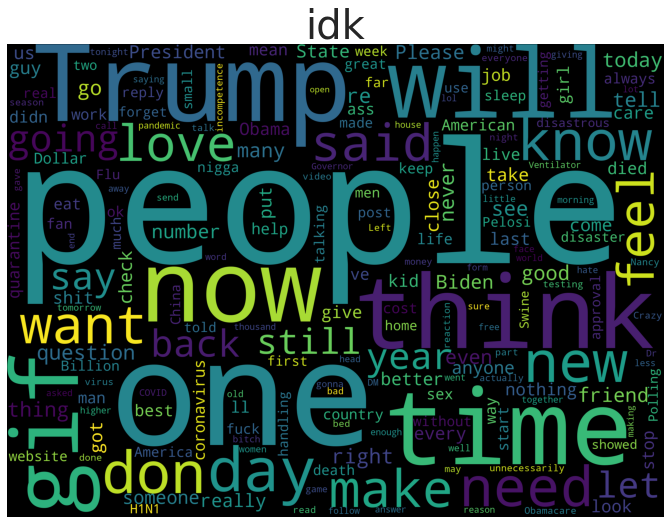

In [0]:
from wordcloud import WordCloud, STOPWORDS

plt.figure(figsize=(40,25))

choose_word = 'idk'

res = []
for i in range(len(train.categories)):
    if choose_word in train.categories[i]:
        res.append(train.text[i])

cloud_word = WordCloud(

stopwords=STOPWORDS,

background_color='black',

collocations=False,

width=2500,

height=1800

).generate(" ".join(res))

plt.subplot(2, 3, 1)

plt.axis('off')

plt.title(choose_word, fontsize=40)

plt.imshow(cloud_word)

## One hot encoding

In [0]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
ohtrain = pd.DataFrame(mlb.fit_transform(train['categories']),columns=mlb.classes_)
ohtrain

,agree,applause,awww,dance,deal_with_it,do_not_want,eww,eye_roll,facepalm,fist_bump,good_luck,happy_dance,hearts,high_five,hug,idk,kiss,mic_drop,no,oh_snap,ok,omg,oops,please,popcorn,scared,seriously,shocked,shrug,sigh,slow_clap,smh,sorry,thank_you,thumbs_down,thumbs_up,want,win,wink,yawn,yes,yolo,you_got_this
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31998,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Correlation heat map

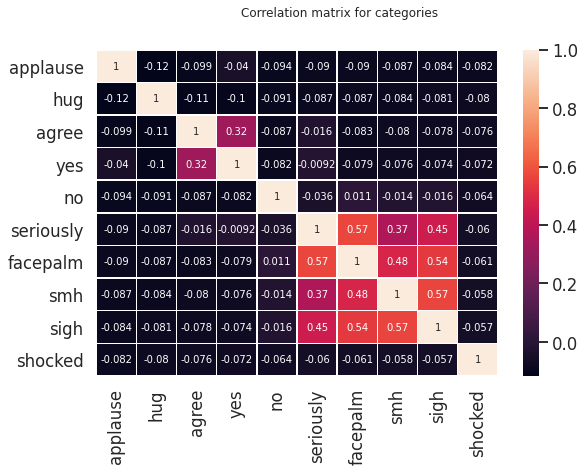

In [0]:
tmp = ['applause', 'hug', 'agree', 'yes', 'no', 'seriously', 'facepalm', 'smh', 'sigh', 'shocked']
f, ax = plt.subplots(figsize=(9, 6))
f.suptitle('Correlation matrix for categories')
sns.heatmap(ohtrain[tmp].corr(), annot=True, linewidths=.5, ax=ax)

In [0]:
ohtrain['total_length'] = train['text'].str.len()
ohtrain['new_line'] = train['text'].str.count('\n'* 1)
ohtrain['new_small_space'] = train['text'].str.count('\n'* 2)
ohtrain['uppercase_words'] = train['text'].apply(lambda l: sum(map(str.isupper, list(l))))
ohtrain['question_mark'] = train['text'].str.count('\?')
ohtrain['exclamation_mark'] = train['text'].str.count('!')

FEATURES = ['total_length', 
            'new_line', 
            'new_small_space', 
            'uppercase_words',
            'question_mark',
            'exclamation_mark']
tmp += FEATURES

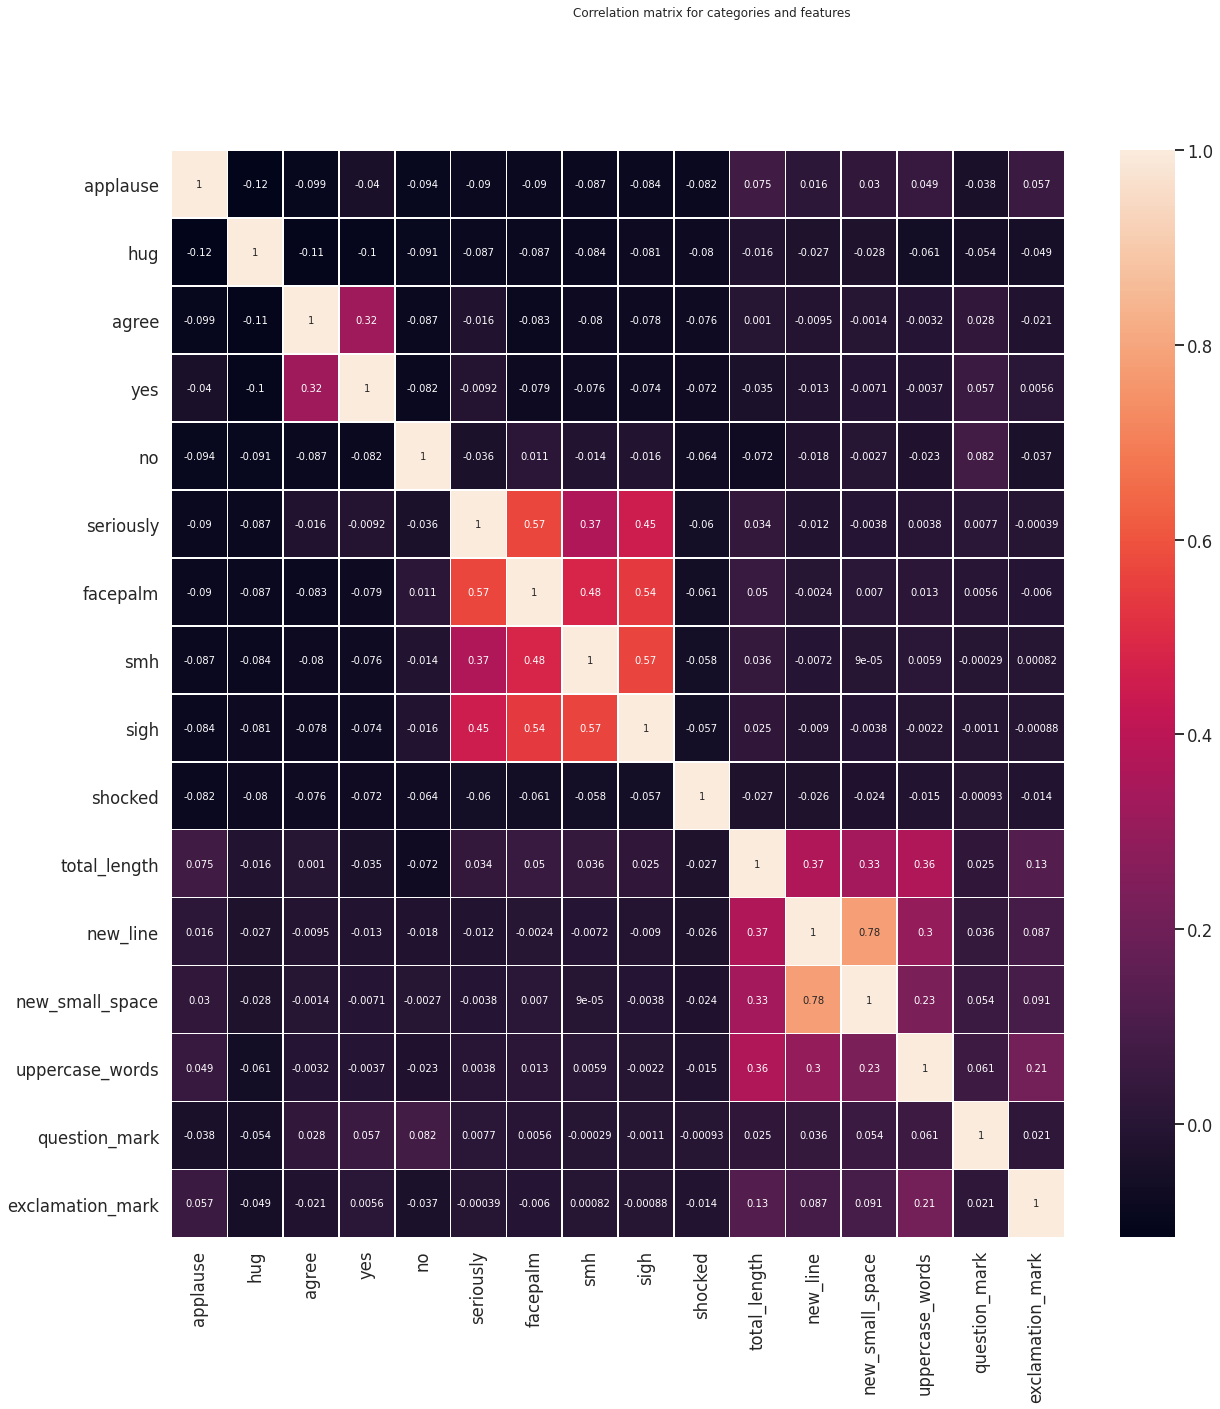

In [0]:
f, ax = plt.subplots(figsize=(20, 20))
f.suptitle('Correlation matrix for categories and features')
sns.heatmap(ohtrain[tmp].corr(), annot=True, linewidths=.5, ax=ax)

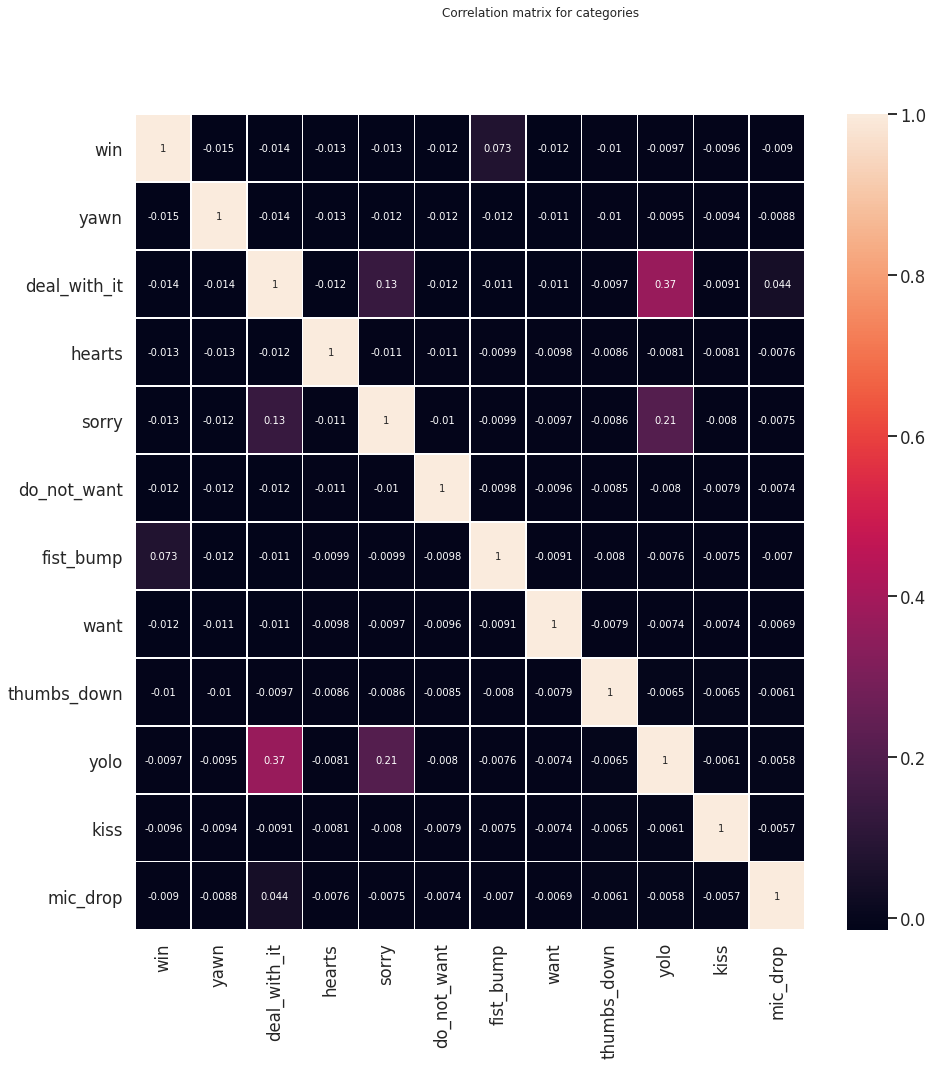

In [0]:
tmp2 = []
for i in range(31, 43):
    tmp2.append(c[i][0])
f, ax = plt.subplots(figsize=(15, 15))
f.suptitle('Correlation matrix for categories')
tmp2
sns.heatmap(ohtrain[tmp2].corr(), annot=True, linewidths=.5, ax=ax)

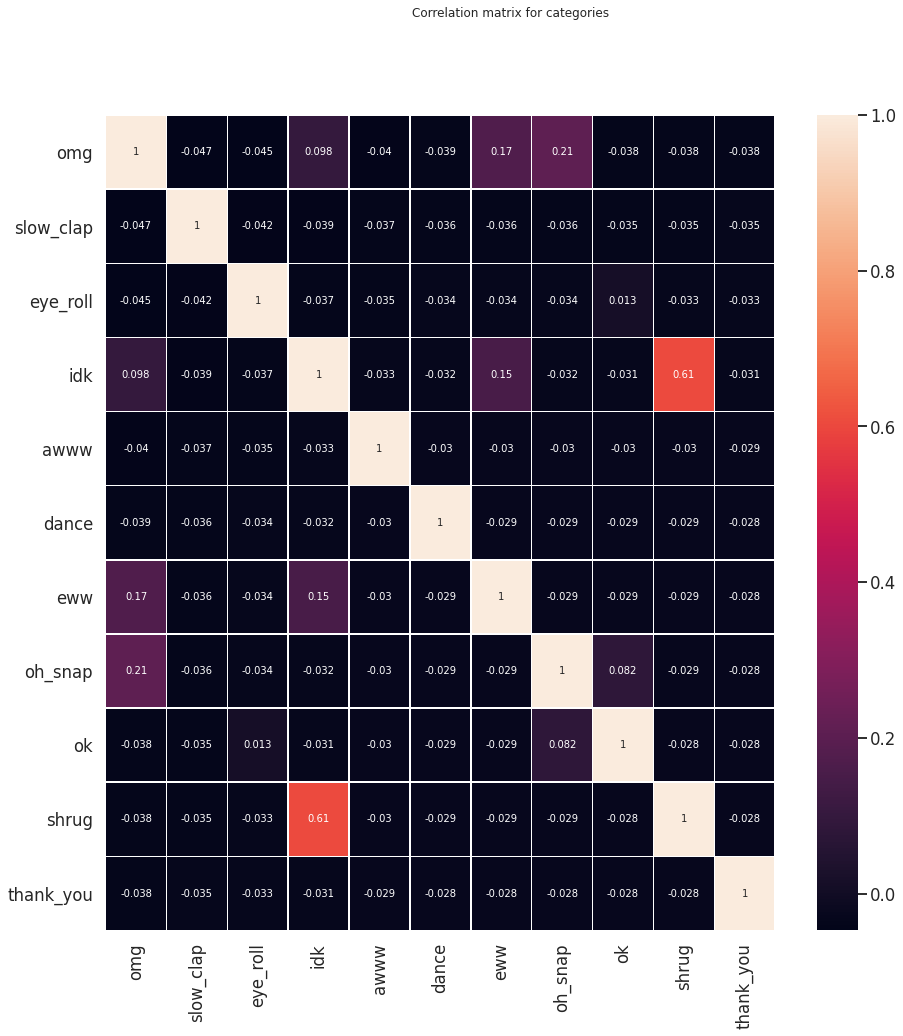

In [0]:
tmp3 = []
for i in range(10, 21):
    tmp3.append(c[i][0])
f, ax = plt.subplots(figsize=(15, 15))
f.suptitle('Correlation matrix for categories')
tmp3
sns.heatmap(ohtrain[tmp3].corr(), annot=True, linewidths=.5, ax=ax)

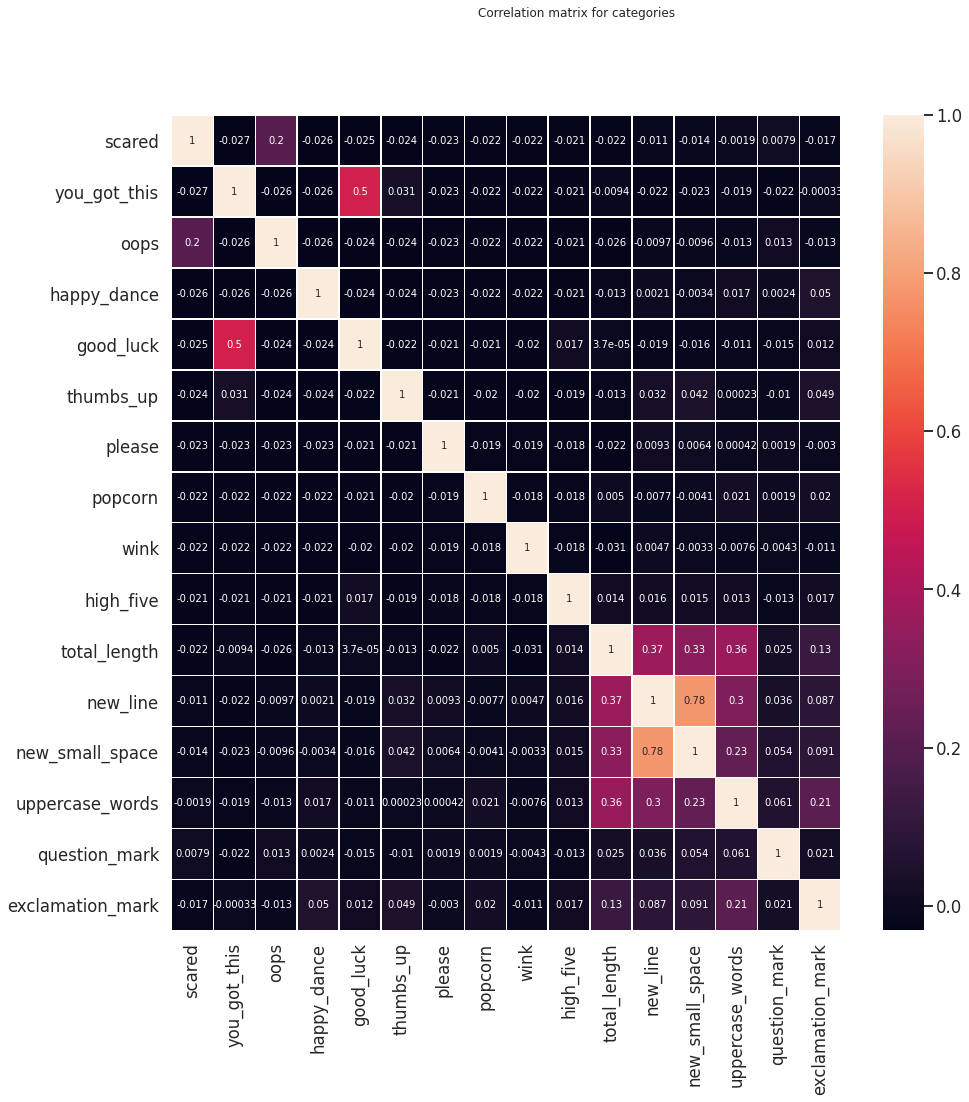

In [0]:
tmp4 = []
for i in range(21, 31):
    tmp4.append(c[i][0])
f, ax = plt.subplots(figsize=(15, 15))
f.suptitle('Correlation matrix for categories')
tmp4 += FEATURES
sns.heatmap(ohtrain[tmp4].corr(), annot=True, linewidths=.5, ax=ax)

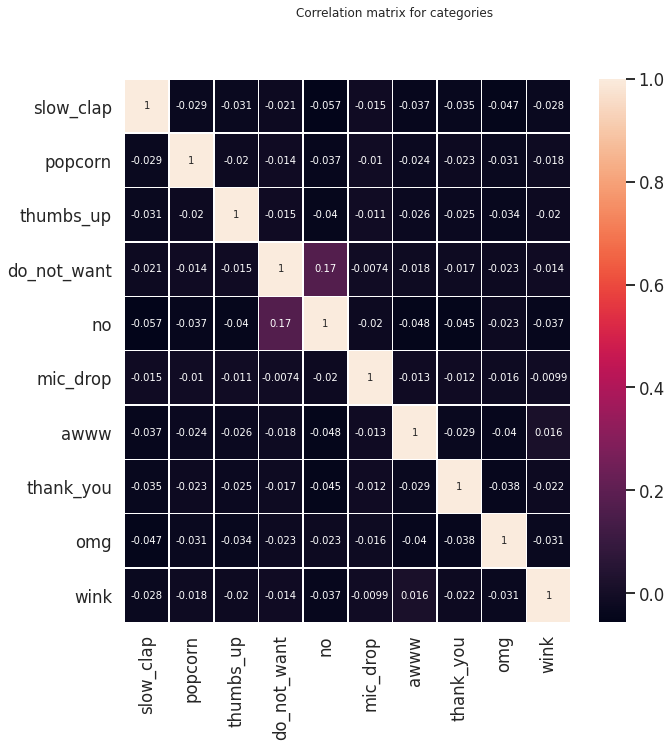

In [0]:
import random
tmp5 = random.sample(category, 10)
f, ax = plt.subplots(figsize=(10, 10))
f.suptitle('Correlation matrix for categories')
sns.heatmap(ohtrain[tmp5].corr(), annot=True, linewidths=.5, ax=ax)

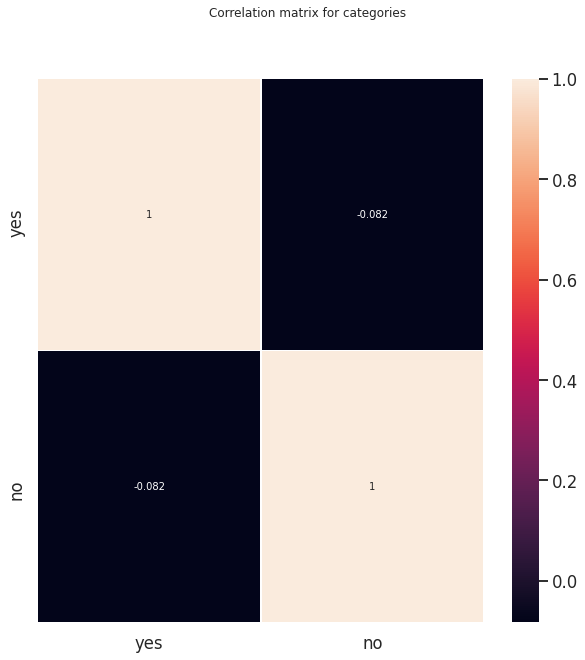

In [0]:
ttt = ['yes', 'no']
f, ax = plt.subplots(figsize=(10, 10))
f.suptitle('Correlation matrix for categories')
sns.heatmap(ohtrain[ttt].corr(), annot=True, linewidths=.5, ax=ax)